Group Members:
* NABILA HUSNA BINTI ROSLI MCS231009
* NUR AZIMAH BINTI MOHD SALLE HMCS231011
* SITI NORAFIZAH BINTI AB AZIZ MCS231018

## Importing Libraries

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, IncrementalPCA, TruncatedSVD
import re
import string
from sklearn.cluster import DBSCAN
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import silhouette_score
from scipy.stats import randint, uniform
from scipy.stats import loguniform



In [4]:
import time
from sklearn.model_selection import ParameterSampler


In [5]:
#data = data ='cleaned_data.csv'
#df_train = pd.read_csv(data)
#df_train.head()

# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_data_new.csv')

# Display the first 5 rows of the DataFrame
df.head(5)

,label,text,text_length,tokens,noPunc tokens,noStopW tokens,lemmatized tokens
0,Household,paper plane design framed wall hanging motivat...,1338,"['paper', 'plane', 'design', 'framed', 'wall',...","['paper', 'plane', 'design', 'framed', 'wall',...","['paper', 'plane', 'design', 'framed', 'wall',...",paper plane design framed wall hanging motivat...
1,Household,"saf 'floral' framed painting (wood, 30 inch x ...",346,"['saf', ""'floral"", ""'"", 'framed', 'painting', ...","['saf', 'floral', 'framed', 'painting', 'wood'...","['saf', 'floral', 'framed', 'painting', 'wood'...",saf floral framed painting wood inch x inch sp...
2,Household,saf 'uv textured modern art print framed' pain...,1316,"['saf', ""'uv"", 'textured', 'modern', 'art', 'p...","['saf', 'uv', 'textured', 'modern', 'art', 'pr...","['saf', 'uv', 'textured', 'modern', 'art', 'pr...",saf uv textured modern art print framed painti...
3,Household,"saf flower print framed painting (synthetic, 1...",1091,"['saf', 'flower', 'print', 'framed', 'painting...","['saf', 'flower', 'print', 'framed', 'painting...","['saf', 'flower', 'print', 'framed', 'painting...",saf flower print framed painting synthetic inc...
4,Household,incredible gifts india wooden happy birthday u...,989,"['incredible', 'gifts', 'india', 'wooden', 'ha...","['incredible', 'gifts', 'india', 'wooden', 'ha...","['incredible', 'gifts', 'india', 'wooden', 'ha...",incredible gift india wooden happy birthday un...


In [6]:
df.shape

(27802, 7)

27802 rows: This represents the number of data points (descriptions + reviews) in the dataset.

7 columns: These columns likely contain features or information associated with each review/description.

# Experiment Design for DBSCAN Starts Here !
## Step 1: Feature Extraction using TF-IDF Vectorization

* Objective: 
    * Convert text data into numerical features.
* Method: 
    * Use TF-IDF (Term Frequency-Inverse Document Frequency) to transform the text data into vectors.
* Procedure: 
    * Preprocess the text data (e.g., remove stop words, tokenize, stemming/lemmatization).
    * Apply TF-IDF vectorization to convert the text data into a matrix of TF-IDF features.

In [7]:
#def tfidf_vectorization(data):
#    tfidf_vectorizer = TfidfVectorizer()
#    tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized tokens'])
#    return tfidf_matrix


In [8]:
# To print the entire array
np.set_printoptions(threshold=np.inf)

# Vectorizing the Lemmatized Tokens using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df['lemmatized tokens'])

tfidf

<27802x78811 sparse matrix of type '<class 'numpy.float64'>'
	with 1427868 stored elements in Compressed Sparse Row format>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_tfidf_features(tfidf, vectorizer, top_n=20):
    feature_names = vectorizer.get_feature_names_out()
    sums = tfidf.sum(axis=0)
    data = [(feature_names[i], sums[0, i]) for i in range(sums.shape[1])]
    ranking = pd.DataFrame(data, columns=['feature', 'tfidf'])
    ranking = ranking.sort_values('tfidf', ascending=False).head(top_n)
    sns.barplot(x='tfidf', y='feature', data=ranking)
    plt.title(f"Top {top_n} TF-IDF Features")
    plt.show()


In [10]:
tfidf

<27802x78811 sparse matrix of type '<class 'numpy.float64'>'
	with 1427868 stored elements in Compressed Sparse Row format>

In [11]:
tfidf.shape

(27802, 78811)

In [12]:
print(tfidf)

  (0, 58300)	0.04708477387351897
  (0, 18100)	0.05361717308861122
  (0, 28411)	0.0658150348192183
  (0, 16824)	0.07560408036998237
  (0, 34367)	0.09106671761051961
  (0, 51757)	0.04807998260682389
  (0, 39329)	0.0967403093002928
  (0, 56146)	0.08141254920000783
  (0, 40047)	0.0967403093002928
  (0, 75710)	0.10907304817115215
  (0, 25517)	0.08196765290582556
  (0, 70501)	0.10005314033021447
  (0, 23579)	0.12233481289682663
  (0, 26077)	0.05688369214787876
  (0, 21133)	0.06694694576018027
  (0, 61473)	0.07638314928437351
  (0, 47128)	0.06995146414763731
  (0, 12899)	0.03377311106942405
  (0, 57752)	0.058806887868804045
  (0, 40142)	0.12233481289682663
  (0, 21135)	0.05114803667888287
  (0, 31205)	0.07334853401094206
  (0, 8489)	0.058197092647471395
  (0, 7186)	0.12233481289682663
  (0, 22414)	0.0977468402590339
  :	:
  (27801, 23174)	0.027711755192109284
  (27801, 22839)	0.03351331601598193
  (27801, 38798)	0.04216865963543963
  (27801, 6314)	0.06054338955235481
  (27801, 45870)	0.063765

In [13]:
# After fitting the TF-IDF vectorizer, retrieve the vocabulary mapping
feature_names = tfidf_vectorizer.get_feature_names_out()

# Example - To find the word corresponding to a specific column index (eg.: 16638)
word_at_index= feature_names[16638]
print("Word at column index:", word_at_index)

Word at column index: decor


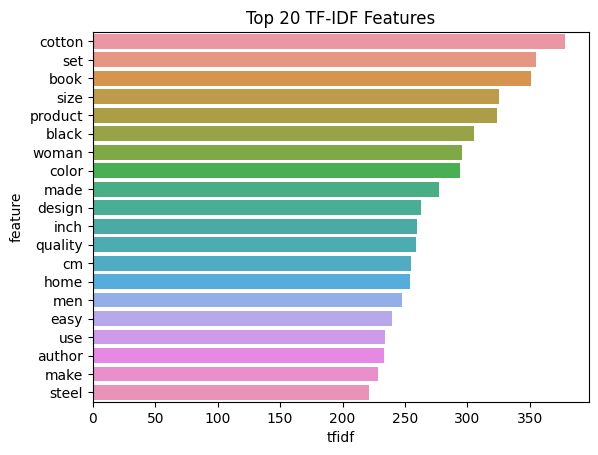

In [14]:
visualize_top_tfidf_features(tfidf, tfidf_vectorizer)

* X-axis (tfidf score) representing the Term Frequency-Inverse Document Frequency value, which indicates the importance of a word in a document relative to a corpus. 
* Y-axis (feature) listing the top 20 terms with the highest TF-IDF scores.
* Words with higher TF-IDF scores are more unique and significant in the context of the documents they appear in. 
* In this chart, "cotton" has the highest TF-IDF score, indicating it's a particularly important term in the analyzed documents.
* The terms such as "set," "book," "size," "product," and "black" are also significant, suggesting frequent and unique use in the dataset. 
* This information can be useful for understanding the main themes and distinguishing terms in the dataset. 
* For instance, in an e-commerce context, "cotton" might be prevalent in descriptions of clothing products, while "book" might be important in a subset of products related to literature.


## Step 2: Dimensionality Reduction Truncated SVD

* Objective: 
    * Reduce the dimensionality of the feature space to make the clustering process more efficient and mitigate the curse of dimensionality.
* Method: 
    * By leveraging TruncatedSVD with sparse data handling, this approach should significantly reduce memory usage and allow you to process larger datasets more efficiently.


In [15]:
# Step 2: Dimensionality Reduction with Truncated SVD
def apply_truncated_svd(tfidf, n_components=100):
    svd = TruncatedSVD(n_components=n_components)
    reduced_data = svd.fit_transform(tfidf)
    return reduced_data


In [16]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_reduced_data_2d(reduced_data):
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=5)
    plt.title("2D Visualization of Reduced Data")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

def visualize_reduced_data_3d(reduced_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], s=5)
    ax.set_title("3D Visualization of Reduced Data")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.show()


## Step 3: Develop Initial DBSCAN Clustering Model

* Objective: 
    * Apply DBSCAN to cluster the data without predefined clusters.
* Method: 
    * Use the DBSCAN algorithm with initial parameters.
* Procedure:
    * Set initial parameters for DBSCAN (e.g., eps and min_samples).
    * Apply DBSCAN to the reduced data with Truncated SVD.
    * Evaluate the clustering results using metrics like silhouette score, noise points percentage, and cluster quality.

In [17]:
# Step 3: Develop Initial DBSCAN Clustering Model
def initial_dbscan(reduced_data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(reduced_data)
    return clusters


In [18]:
def visualize_dbscan_clusters(reduced_data, clusters, eps, min_samples):
    unique_labels = set(clusters)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        
        class_member_mask = (clusters == k)
        xy = reduced_data[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f'Cluster {k}')
    
    plt.title(f"DBSCAN Clusters (eps={eps}, min_samples={min_samples})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()


## Step 4: Tuning the DBSCAN Parameters

* Objective: 
    * Optimize the parameters (eps and min_samples) to improve clustering performance.
* Method: 
    * Perform parameter tuning using techniques like grid search or random search.
* Procedure:
    * Define a range of values for eps and min_samples.
    * Systematically vary the values of eps and min_samples.
    * Evaluate the clustering results for each parameter combination.
    * Select the parameter combination that yields the best clustering performance based on evaluation metrics.

In [19]:
# Step 4: Tuning the DBSCAN Parameters using Randomized Search
def tune_dbscan(reduced_data, param_distributions, n_iter=10, random_state=42):
    best_params = None
    best_silhouette = -1
    
    start_time = time.time()  # Start time

    param_list = list(ParameterSampler(param_distributions, n_iter=n_iter, random_state=random_state))
    
    for params in param_list:
        dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
        clusters = dbscan.fit_predict(reduced_data)
        if len(set(clusters)) > 1:  # More than one cluster
            silhouette_avg = silhouette_score(reduced_data, clusters)
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_params = params

    end_time = time.time()  # End time
    elapsed_time = end_time - start_time  # Total running time
    
    print(f"Tuning time: {elapsed_time:.2f} seconds")
    
    return best_params['eps'], best_params['min_samples']


## Step 5: Develop Final DBSCAN Model

* Objective: 
    * Build the final DBSCAN clustering model with the optimal parameters.
* Method: 
    * Use the best parameter values from the tuning step.
* Procedure:
    * Apply DBSCAN with the optimal eps and min_samples parameters to the reduced data.
    * Analyze the final clusters and interpret the results.
    * Validate the model by checking the stability and consistency of the clusters on different subsets of data or through cross-validation if applicable.

In [20]:
# Step 5: Develop Final DBSCAN Model
def final_dbscan(reduced_data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(reduced_data)
    return clusters


In [22]:
# Application
reduced_data = apply_truncated_svd(tfidf)


In [32]:
reduced_data

array([[ 1.66026007e-01,  1.42524441e-02,  3.92130350e-04],
       [ 1.17675535e-01, -1.06178041e-02,  3.39840898e-03],
       [ 1.68232568e-01, -9.06909434e-03, -2.27998360e-02],
       [ 1.75573426e-01, -8.80887332e-03, -1.75933862e-02],
       [ 1.71437856e-01, -3.14195580e-03, -5.75900817e-03],
       [ 1.96654541e-01, -1.08471061e-02, -4.46480440e-02],
       [ 1.81031412e-01,  1.23849831e-02, -2.57560650e-03],
       [ 1.54553570e-01, -3.72719125e-03, -1.55241246e-02],
       [ 1.47532287e-01, -1.03496731e-03, -1.83120421e-02],
       [ 1.72716745e-01,  1.25118014e-02, -1.55063550e-02],
       [ 1.39226419e-01, -1.26267861e-02, -4.62795616e-02],
       [ 9.74770427e-02, -2.26305011e-02, -2.62826968e-02],
       [ 1.35927520e-01,  4.20666836e-03,  1.15575955e-02],
       [ 5.87358260e-02,  8.33511287e-03, -4.87203714e-03],
       [ 1.52024468e-01,  5.04022909e-04,  2.69669102e-03],
       [ 1.46958018e-01, -1.17680753e-03, -3.59116305e-03],
       [ 1.18306042e-01,  5.56803120e-03

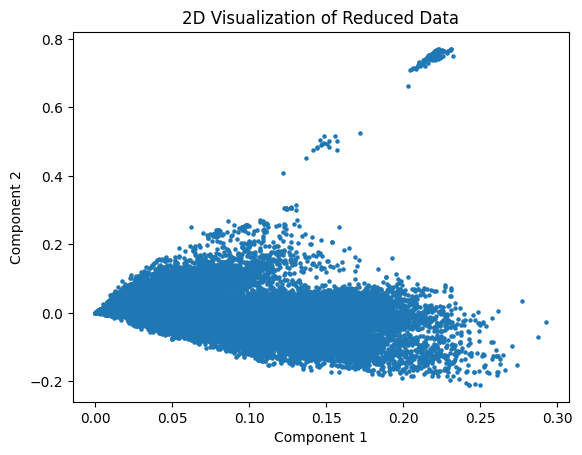

In [33]:
reduced_data = apply_truncated_svd(tfidf, n_components=3)
visualize_reduced_data_2d(reduced_data)


* The scatter plot shows the distribution of data points in a two-dimensional space. 
* Each point represents a reduced-dimension representation of an original data point from the dataset. 
* Areas with higher densities of points suggest regions where data points have similar characteristics. 
* The plot shows a dense region towards the bottom left, indicating a large number of data points with similar values for the two components. 
* There are distinct groupings and outliers, particularly visible in the upper right portion of the plot. 
* This separation could indicate clusters of data points with significantly different characteristics from the main group. 
* Such visualizations are useful for understanding the structure of the dataset before applying clustering algorithms like DBSCAN. 
* The visible clusters and outliers can guide the choice of parameters and the interpretation of clustering results.

In [24]:
# Initial DBSCAN Model
initial_clusters = initial_dbscan(reduced_data)


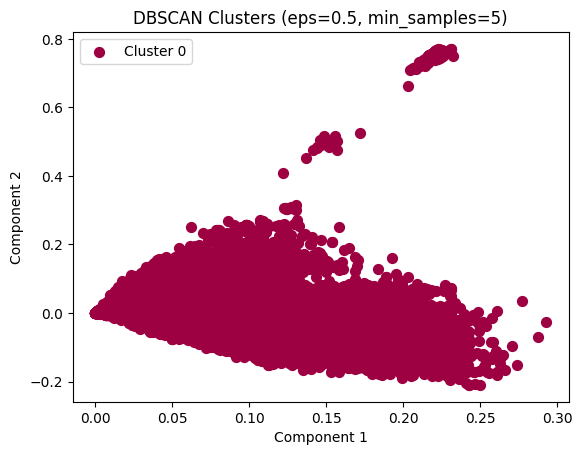

In [25]:
initial_clusters = initial_dbscan(reduced_data)
visualize_dbscan_clusters(reduced_data, initial_clusters, eps=0.5, min_samples=5)


* Visualization of the clusters identified by DBSCAN on the reduced data, showing that the clusters might be irregular and not well-defined.


In [26]:
# Parameter Tuning using Randomized Search
param_distributions = {
    'eps': loguniform(0.1, 1.0),
    'min_samples': range(1, 10)
}
best_eps, best_min_samples = tune_dbscan(reduced_data, param_distributions, n_iter=30)


Tuning time: 655.65 seconds


In [27]:
# Final DBSCAN Model
final_clusters = final_dbscan(reduced_data, best_eps, best_min_samples)


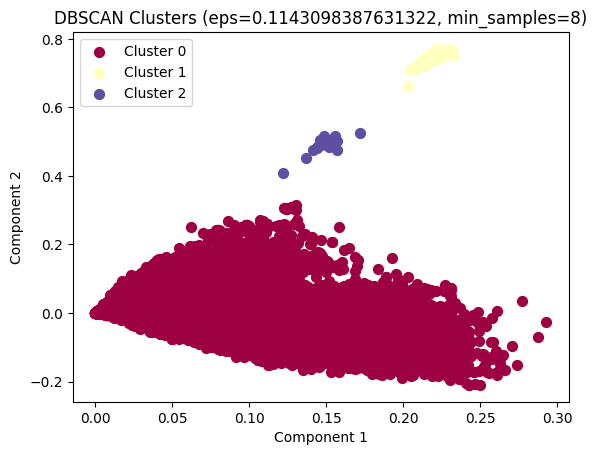

In [28]:
visualize_dbscan_clusters(reduced_data, final_clusters, best_eps, best_min_samples)


* Visualization of  the clusters obtained after parameter tuning, which are more regular and well-defined, highlighting the areas where data points naturally group together. 
* The tuning process significantly enhances the quality of clustering, resulting in more distinct and meaningful clusters while reducing noise. 
* This comparison underscores the importance of parameter optimization in achieving accurate and actionable clustering outcomes.

In [29]:
# Output the results
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")
print("Final clusters:", final_clusters)


Best eps: 0.1143098387631322, Best min_samples: 8
Final clusters: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Additional Analysis
* Silhouette analysis to evaluate the quality of clusters:

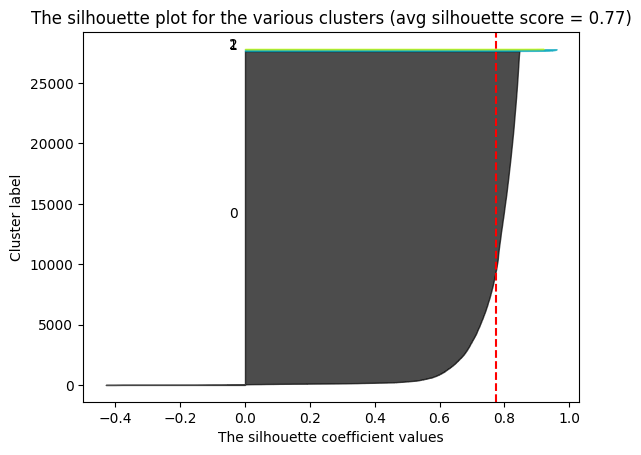

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette_analysis(reduced_data, clusters):
    silhouette_avg = silhouette_score(reduced_data, clusters)
    sample_silhouette_values = silhouette_samples(reduced_data, clusters)

    fig, ax = plt.subplots()
    y_lower = 10
    for i in np.unique(clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / len(np.unique(clusters)))
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax.set_title(f"The silhouette plot for the various clusters (avg silhouette score = {silhouette_avg:.2f})")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

visualize_silhouette_analysis(reduced_data, final_clusters)


## Silhouette Analysis

### Silhouette Plot
The silhouette plot is a visual representation used to evaluate the quality of clustering in a dataset. It assesses how well-separated different clusters are and how similar data points within each cluster are to each other. The x-axis represents silhouette coefficient values, ranging from -0.4 to 1.0. The y-axis shows cluster labels (from 0 to 25000).
### Silhouette Score
The average silhouette score for these clusters is approximately 0.77. A higher silhouette score indicates better separation between clusters. Values close to 1 suggest well-defined clusters. The shaded area in the plot represents the silhouette scores for each data point. Data points closer to 1 are well-clustered, while those closer to 0 or negative values may be misclassified. The red dashed vertical line indicates the average silhouette score.


## Conclusion
Based on the silhouette score, DBSCAN has a higher score which is 0.77 compared to other clustering algorithms (like K-means and Hierarchical Agglomerative), it suggests that the clusters formed by DBSCAN are well-defined, and data points within the same cluster are similar to each other and dissimilar to points in other clusters. 
Despite the higher silhouette score from DBSCAN, K-means might be preferred for its faster computation, scalability, and easier interpretability, making it more practical for operational use and decision-making processes.